# Million dollar website scrap

## Load libraries

In [1]:
import re
import time
import lxml
import lxml.etree
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

## Set basic URL parameters

In [2]:
url = 'http://www.milliondollarhomepage.com/'
page = requests.get(url)

## Parse the values 'url','xmin','ymin','xmax', 'ymax', 'area', 'status' of each area using the library re (Regular expressions)
The squares sold in the site can be determined based on the html code, every square is inside of a <area> tag, I will parse them all using the library Regular expressions


In [3]:
start_time = time.time()
web_re = pd.DataFrame(columns = ['url','xmin','ymin','xmax', 'ymax', 'area', 'status'])
pattern = '<area(.+)>'
areas_re = re.findall(pattern,page.text)
i = 0
for area_re in areas_re:
    i += 1
    pattern_coords='coords=\"([\, , -]*[0-9]+[\, , -]*[0-9]+[\, , -]*[0-9]+[\, , -]*[0-9]+)\"'
    coords_re = str(re.findall(pattern_coords,area_re))[2:-2]
    coord_re = str(coords_re).split(',')
    xmax = coord_re[0]
    ymax = coord_re[1]
    xmin = coord_re[2]
    ymin = coord_re[3]
    area = (int(xmax)-int(xmin))*(int(ymax)-int(ymin))
    # get url
    pattern_url='href="(.+)" '
    url_re = str(re.findall(pattern_url,area_re))[2:-2]
    #get state
    try:
        page_re = requests.head(str(url_re), timeout=1)
        status_re = page_re.status_code
    except:
        status_re = 'time out'
    temp_df = pd.DataFrame(data ={'url':[url_re],'xmin':[xmin],'ymin':[ymin],
                          'xmax':[xmax],'ymax':[ymax],'area':[area],'status':[status_re]}) 
    web_re = web_re.append(temp_df)
    print(i,url_re,status_re,area)
    
print("--- %s seconds ---" % (time.time() - start_time))
# save the dataframe into a csv
web_re.reset_index(drop=True).to_csv('million dollar web re.csv')

1 http://www.getpixel.net/ time out 100
2 http://www.mynewbritain.com/ 200 100
3 http://www.pandasoftware.com/ 301 900
4 http://www.frozenweb.co.uk/ 302 100
5 http://www.sillyant.com/?src=1M time out 600
6 http://www.rentclicks.com/ time out 3900
7 http://www.kickbuttideas.com/12.php?p=1000&a=extramoney 404 100
8 http://www.fastminimoto.co.uk/ time out 100
9 http://www.hamsterland.com/million.asp time out 100
10 http://localtap.net/ time out 700
11 http://www.dreamwords.com/ 200 600
12 http://www.eriqx.com/ 200 100
13 http://www.homes-uk.co.uk/ 200 100
14 http://www.webgatehost.com/ 302 200
15 http://www.tomalbrighton.co.uk/ time out 100
16 http://www.you-get-rich.com/ 403 600
17 http://www.seitensprung-agentur-online.de/ 403 100
18 http://atyu.com/show/ time out 100
19 http://www.tonerific.com/ 200 100
20 http://www.esquemedia.com/ 301 100
21 http://www.stayathomejobguide.com/ 200 100
22 http://www.thereservationcenter.com/ time out 100
23 http://www.celebpoker.com/promotions.asp 200 

181 http://www.alwayslookaround.com/ 200 200
182 https://www.jurassicjewellery.co.uk/ 200 100
183 http://www.dupedgroup.com/ 200 100
184 http://www.blackpig.co.uk/ 301 400
185 http://www.spongenb.com/ 301 100
186 http://www.darrenstraight.com/ 200 200
187 http://www.pillage.com/ 200 400
188 http://www.ioweyou.co.uk/ 301 100
189 http://www.e-quotesdirect.co.uk/ 301 100
190 http://www.gaminginstruction.com/ 200 100
191 http://www.engineassault.com/ time out 100
192 http://www.voiptelephonesystem.org/?r=1 200 100
193 http://www.cartridgesave.co.uk/ 301 900
194 http://www.language-buddy.com/ time out 100
195 http://stores.ebay.co.uk/Ear-Power/UK.html 302 100
196 http://www.thedateexchange.com/ 200 300
197 http://www.passionsnetwork.com/ 301 100
198 http://www.iamapirate.com/ 200 100
199 http://www.thinkingjuice.co.uk/ 301 100
200 http://www.bskc.co.uk/ 301 400
201 http://www.wandan.co.uk/ 200 100
202 http://www.trustthedj.com/ 200 400
203 http://banner.usapoker.com/cgi-bin/redir.cgi?id=N&m

357 http://www.blueteagames.com/ time out 400
358 http://www.placeclick.com/ 302 100
359 http://www.placeclick.co.uk/ 200 100
360 http://www.placeclick.com.au/ 200 100
361 http://www.coastalcomms.org.uk/ 200 100
362 http://work-at-home-now.us/ time out 100
363 http://www.mazmanian.net/dictum.html 404 200
364 http://www.theatrelayout.co.uk/ 200 100
365 http://www.chinesehorizon.com/ 200 400
366 http://www.acidfonts.com/ 301 100
367 http://www.taxpacks.co.uk/ time out 100
368 http://www.iexplorer.org/ time out 100
369 http://www.realwwz.ch/ 302 100
370 http://www.ayom.com/ time out 100
371 http://www.kreditkarten-guenstig.ch/ time out 100
372 http://www.disaster-recovery.ch/ time out 100
373 http://www.thedogweb.co.uk/ 403 100
374 http://www.lollipopanimation.com/ 200 600
375 http://www.rattat.com/promotions/ipod/ 302 200
376 http://www.lingerietemptations.com/ 301 100
377 http://www.lingerietemptations.com/ 301 100
378 http://www.gamebrew.com/ 200 300
379 http://www.welcometowallyworld.

532 http://www.miracledrywash.com/ 200 300
533 http://www.pdwsolutions.co.uk/ time out 300
534 http://www.sagaralaser.com/ 200 800
535 http://richbythirty.com/ 301 100
536 http://www.naijasounds.com/ 301 100
537 http://www.infotechart.com/ time out 200
538 http://www.slimmingsolutions.co.uk/ 301 300
539 http://www.leondean.com/ 301 100
540 http://www.awin1.com/awclick.php?mid=1142&id=47075 302 600
541 http://www.fisbo.co.uk/ time out 400
542 http://www.davesite.com/webstation/html/mdh/ 301 400
543 http://www.cutlerybox.com/ 302 300
544 http://www.pcdirect.com/default.asp?PID=14 301 100
545 http://www.geeeek.com/ 302 200
546 http://tinyninjas.com/ 302 200
547 http://www.cadogon.com/ time out 100
548 http://www.xoshare.com/ 302 400
549 http://www.superstarpics.com/ 302 300
550 http://www.wizardtrivia.com/ time out 100
551 http://www.wizardtrivia.com/multiplayer_quiz.html time out 100
552 http://www.wizardtrivia.com/trivia_university.html time out 100
553 http://wizardtrivia.com/daily_spo

704 http://partners.powweb.com/cgi-bin/click.cgi?id=sugnupnow 500 100
705 http://www.bookofcool.com/ 200 4000
706 http://www.mymemory.co.uk/ 301 800
707 http://www.take-a-piano-sheet-music-break.com/free-piano-sheet-music.html 301 400
708 http://www.flipstores.com/ time out 900
709 http://www.ten-best-credit-cards.com/123/ 200 100
710 http://www.kidspartysurvivalguide.com/ 200 100
711 http://www.paynetglobal.com/ 302 100
712 http://www.dynamicfunctions.com/ 403 100
713 http://www.5f1.com/ 302 100
714 http://www.quanthome.com/ 403 100
715 http://www.positiveintegers.org/ 403 100
716 http://www.dhome.net/ 302 100
717 http://www.patiopieces.com/ 200 100
718 http://www.pokeroffice.net/ 301 400
719 http://images.coolness.com/pixels/lostpedia/ 200 100
720 http://images.coolness.com/pixels/coolness/ 200 100
721 http://psmw-nm.de/mdh/ 403 100
722 http://www.gagaplay.com/ time out 200
723 http://www.xtend-life.com/main/products.asp?product=ch&page=main&ID=720938 301 100
724 http://www.thegauntl

883 http://www.rentpixelads.com/y1 301 400
884 http://www.rentpixelads.com/y2 301 400
885 http://www.rentpixelads.com/y3 301 400
886 http://www.rentpixelads.com/main 301 900
887 http://www.marketviews.net/finance.php 302 300
888 http://www.thatsthespirit.com/ 200 600
889 http://www.paydotcom.com/ 200 400
890 http://affiliates.globat.com/cgi-bin/affiliates/clickthru.cgi?id=globat3&page=http://www.globat.com/million/ 200 5100
891 http://www.powerdatingtools.com/indexb.html 302 100
892 http://www.thecasinocatalog.net/ 302 1600
893 http://www.affordableteeth.com/ 200 100
894 http://www.chestrest.com/ time out 200
895 http://www.keypublishing.com/ 302 800
896 http://100-downloads.com/ 301 200
897 http://www.action-pact.co.uk/ time out 200
898 http://www.pcrecovery.com/ time out 100
899 http://www.three60.uk.com/ 302 600
900 http://www.thegiftexpert.com/ time out 100
901 http://www.pagex.com/ 302 100
902 http://www.pixelsforprizes.com/ time out 100
903 http://www.ultrafeel.tv/ 403 100
904 ht

1051 http://www.howdoesfreegrabyou.com/ time out 5400
1052 http://www.w-street.com/ 200 400
1053 http://www.amnwebtech.co.uk/ 200 100
1054 http://www.freeworldgroup.com/ 200 100
1055 http://www.freeworldgroup.com/ 200 100
1056 http://www.freeworldgroup.com/ 200 100
1057 http://www.freeworldgroup.com/ 200 100
1058 http://www.ifungames.com/ 200 100
1059 http://www.ifungames.com/ 200 100
1060 http://www.ifungames.com/ 200 100
1061 http://www.thelaundry.cc/ 200 100
1062 http://www.macpoker101.com/ 200 100
1063 http://www.milliondollardonation.org/ 200 100
1064 http://www.car-travel-games.co.uk/ 200 100
1065 http://www.50wordreview.com/ 200 100
1066 http://www.4thegame.com/ 200 2000
1067 http://www.seborabsinth.com/ time out 2000
1068 http://www.bobhelsinki.fi/ time out 600
1069 http://www.bostonmanor.com/ 200 300
1070 http://www.loughtonfinancialservices.co.uk/ time out 100
1071 http://www.sioss.com/md/ time out 100
1072 http://www.eskyweb.com/index-mdh.php 302 400
1073 http://www.conveyor

1224 http://www.data-creative.com/md.htm time out 300
1225 http://www.blackworld.com/careers.htm 200 400
1226 http://www.freedom-pharmacy.com/BannerAdClicks.asp?AdID=0&AffID=789 time out 600
1227 http://www.theseventhearth.com/ 200 200
1228 http://www.888.com/?lang=en&sr=367059 301 3200
1229 http://tanningmoisturizer.com/ 200 100
1230 http://somethingawesome.com/ 200 100
1231 http://longorshortcapital.com/ 200 100
1232 http://www.tiscali-iba.co.uk/mdhp.html time out 100
1233 http://www.consenting-adults.org/ time out 100
1234 http://www.magic-man.com/ 200 100
1235 http://www.thbi.de/ 301 100
1236 http://www.stfb.com/ 200 400
1237 http://www.thebushadministration.com/ 301 100
1238 http://www.reliefprint.com/ 301 100
1239 http://www.littleredbear.com/ 301 100
1240 http://www.tyson.de/ 302 100
1241 http://reserved/ time out 100
1242 http://www.studserv.de/ 301 100
1243 http://www.amazingballoon.com/ 412 100
1244 http://www.globalyachtracing.com/ 301 100
1245 http://www.allies-computing.co

1399 http://www.corporate-gifts-co.com/ 301 100
1400 http://www.engravedgiftideas.com/ 301 200
1401 http://www.business-gifts-co.com/ time out 100
1402 http://www.engravedgiftideas.com/ 301 100
1403 http://www.corporate-gifts-co.com/ 301 100
1404 http://www.corporate-gifts-co.com/ 301 100
1405 http://www.sololtd.com/ 301 200
1406 http://www.sololtd.com/ 301 100
1407 http://www.mazegifts.com/ 302 200
1408 http://www.corporate-gifts-co.com/ 301 100
1409 http://www.mazegifts.com/ 302 100
1410 http://www.maximuscle.com/deals 410 400
1411 http://www.vbuddy.com/ 404 600
1412 http://www.paris-jones.com/ 301 100
1413 http://www.satphone.co.uk/ 301 100
1414 http://www.coursework.info/ 301 100
1415 http://www.academicdb.com/ time out 100
1416 http://www.thestudentroom.co.uk/ 301 100
1417 http://www.tngdc.co.uk/ time out 100
1418 http://www.virtualwine.co.uk/ time out 100
1419 http://www.unwined-online.co.uk/ 200 100
1420 http://www.computerrepair.com/action/adtracking/link/2x92qxnlnbn1ogdbugsbnl

1577 http://www.squaretomato.com/ 200 100
1578 http://www.esoftcom.biz/ 200 400
1579 http://www.milanodabere.it/ 301 100
1580 http://www.web-studio.co.uk/ 301 100
1581 http://www.edatatrail.com/ time out 400
1582 http://www.financedirectuk.com/ 302 400
1583 http://www.seafarerbooks.com/ time out 100
1584 http://www.blingal.co.uk/ 200 100
1585 http://www.portraitzdirect.co.uk/ time out 100
1586 http://www.sfsgo.com/ 200 100
1587 http://www.essential-change.com/ time out 100
1588 http://www.focusedflows.com/ time out 300
1589 http://www.pixel-market.com/ 302 100
1590 http://www.weight-loss-slimming.com/ 200 100
1591 http://www.avflu.com/ time out 300
1592 http://www.digden.net/index.php?affid=MDHP2 301 100
1593 http://www.milliondollarwomenshomepage.com/ 200 5100
1594 http://www.poppers-shop.at/ 301 300
1595 http://www.bighosting.biz/ 301 100
1596 http://www.diedomainer.com/ time out 100
1597 http://www.hightechbits.com/ 301 100
1598 http://www.swissplanet.ch/ 301 100
1599 http://www.one

1755 http://www.dollarsmash.com/ 200 100
1756 http://www.2millionpixels.com/ 200 200
1757 http://www.milliondollarscript.com/ time out 800
1758 http://www.landroversonly.com/ 301 100
1759 http://www.unigov.org/ 200 400
1760 http://www.myuksearch.co.uk/ time out 100
1761 http://www.elevenmagazine.com/ 302 100
1762 http://www.ringobingo.co.uk/ 200 400
1763 http://www.bolzonello.it/ 301 100
1764 http://www.hotelpeople.com/ 200 3000
1765 http://www.skyclub.com/ 301 200
1766 http://www.safesurfshop.co.uk/ 200 100
1767 http://www.interiors-tides.co.uk/ 200 100
1768 http://www.livestraddle.com/ 302 100
1769 http://www.livestraddle.com/ 302 100
1770 http://www.livestraddle.com/online-poker-central 302 100
1771 http://www.livestraddle.com/online-poker/reviews/party-poker 302 100
1772 http://www.livestraddle.com/online-poker/reviews/empire-poker 302 100
1773 http://www.livestraddle.com/online-poker/reviews/paradise-poker 302 100
1774 http://www.artisangemsboutique.com/ time out 1200
1775 http://

1932 http://www.surfmydot.com/ 200 100
1933 http://Pending%20Order time out 800
1934 http://www.getlotsofcash.com/ time out 100
1935 http://www.nntr.us/ 200 400
1936 http://www.colleges.com/util/markets/marketid.taf?16120 time out 3400
1937 http://www.lovepads.com/ 404 200
1938 http://www.valuemags.com/vmtrack/landingtrack.asp?trackid=mdoll 200 100
1939 http://www.proadvance.com/ 302 100
1940 http://www.80stees.com/index.asp?referer=milliondollarhomepage 301 1000
1941 http://www.80stees.com/index.asp?referer=milliondollarhomepage 301 900
1942 http://blog.myspace.com/index.cfm?fuseaction=blog.ListAll&friendID=18869472&Mytoken=20050620115202 302 100
1943 http://www.80stees.com/Junk-Food-t-shirts.asp?referer=mildolhompagejf 301 100
1944 http://www.akimports.net/ 200 100
1945 http://echeng.com/ 301 200
1946 http://wetpixel.com/ time out 200
1947 http://wetpixel.com/ 200 400
1948 http://www.cashaffilia.com/mdh/dontclick 302 1800
1949 http://www.discountwatcher.com/ 200 100
1950 http://www.j

2102 http://www.webhostmagazine.com/ time out 3200
2103 http://www.heltaskelta.com/ 301 400
2104 http://www.challengefootball.com/ 302 100
2105 http://www.pixels1.com/ 200 900
2106 http://www.pinatas.com/?Click=15602 301 400
2107 http://www.myfundtrader.com/ time out 300
2108 http://www.freecoolin.cz/ 200 100
2109 http://www.arttoget.com/ time out 300
2110 http://www.franklyzoe.com/ 301 100
2111 http://www.2richmoms.com/ time out 100
2112 http://www.shortkutzdvd.com/ 301 100
2113 http://www.skoobabags.com/ time out 200
2114 http://www.gimmemyrate.com/ time out 500
2115 http://www.corpdesignconsultancy.net/ time out 100
2116 http://www.dax.org/ time out 100
2117 http://mysite.verizon.net/vzeo0gqp/marryme/ time out 100
2118 http://www.legalmatch.com/home/Link?ar=/index.html&ai=26 301 300
2119 http://www.legalmatch.com/home/Link?ar=/index.html&ai=26 301 100
2120 http://www.legalmatch.com/home/Link?ar=/index.html&ai=26 301 100
2121 http://www.legalmatch.com/home/Link?ar=/index.html&ai=26 3

2266 http://www.milliondollarbrands.com/ 301 400
2267 http://www.thedavidlawrenceshow.com/mdhp/ time out 800
2268 http://www.clickresponse.net/ 301 100
2269 http://taskline.co.uk/surveil.htm 200 100
2270 http://www.unplannedjourney.com/ time out 100
2271 http://www.onecentads.com/ time out 900
2272 http://www.chalet1802.co.uk/ 301 200
2273 http://www.googamania.com/ time out 100
2274 http://www.milliondollarpixelhomepage.com/ time out 400
2275 http://www.reactivevision.com/ 200 100
2276 http://www.businesspixelad.com/ time out 2000
2277 http://Pending%20Order time out 100
2278 http://www.amhersthypnosis.com/ 301 400
2279 http://www.dpivision.com/ 200 100
2280 http://www.directtraffic.org/ 302 100
2281 http://www.baby-million-dollar.com/ time out 100
2282 http://www.stagsandhens.com/ 302 100
2283 http://www.practicaletiquette.com/ time out 100
2284 http://www.philadelphia-nmfn.com/ time out 100
2285 http://www.danday-nmfn.com/ 301 100
2286 http://www.dyetub.com/ 200 300
2287 http://www.

2430 http://ruffdogs.com/ time out 100
2431 http://milpitashosting.net/milliondollarhomepage.html 302 100
2432 http://www.whattogive.com/index.php?from=mdhp 302 300
2433 http://cretanambience.com/ 302 500
2434 http://www.magicvocabulary.com/ 200 400
2435 http://www.awebapart.com/ 200 100
2436 http://www.onlinecasinobluebook.com/ 301 100
2437 http://www.mymilliondollaradpage.com/ 200 2600
2438 http://www.trayx.com/ 200 100
2439 http://www.trayx.de/ 200 100
2440 http://www.trayx.eu/ 200 100
2441 http://janesacademy.com/ time out 100
2442 http://thesolidsurfer.typepad.com/ 301 100
2443 http://www.themilliondollarfrontpage.com/ time out 100
2444 http://www.greatnet.de/ 302 100
2445 http://www.onlinebizheaven.com/web-hosting-p3.html time out 100
2446 http://experpix.com/ time out 100
2447 http://www.dailydonkey.com/ 500 100
2448 http://www.befamous.co.uk/ time out 100
2449 http://www.bingobase.com/ 301 100
2450 http://www.takeawhiff.com/ 200 200
2451 http://www.vphqtournaments.com/ time out

2610 http://www.nottingham.ac.uk/enterprise 301 500
2611 http://Paid%20&%20Reserved%20-%20Jeremy%20Rodwell time out 100
2612 http://www.projectnavigator.com/ 200 600
2613 http://www.ans.com.au/~sydney/pages/roulett.htm 301 200
2614 http://www.flattopwoodworks.com/ 200 100
2615 http://vipbeautyshop.com/ time out 400
2616 http://www.apathyunlimited.co.uk/ 403 100
2617 http://www.vmcsatellite.com/channels/dish_splash.cfm?aid=224928 200 100
2618 http://Reserved%20for%20Russian%20Fun%20Club time out 100
2619 http://Reserved%20for%20Russian%20Fun%20Club time out 100
2620 http://www.giftcardsetc.net/ time out 400
2621 http://bestturnedout.co.uk/ 200 100
2622 http://www.consumerpad.com/ time out 200
2623 http://www.creditcardbank.co.uk/ time out 600
2624 http://www.myswap.co.uk/ 403 100
2625 http://www.tooxta.com/ time out 100
2626 http://www.swissmade.com/ 200 100
2627 http://www.worldofpersia.com/ 200 400
2628 http://www.primevoices.com/ 301 100
2629 http://www.whyagel.com/ 404 100
2630 http

2780 http://www.epuppets.com/ 200 100
2781 http://www.jebead.com/ 200 100
2782 http://www.asexcreations.com/ time out 100
2783 http://www.inkdigital.com/ 200 100
2784 http://www.ivponline.com/ 200 100
2785 http://www.insurance-cheap.co.uk/ 200 400
2786 http://www.theindiegourmet.com/ 302 100
2787 http://www.alchemyweb.ca/ 200 100
2788 http://www.beatpick.com/ 200 100
2789 http://www.gensap.com/ 302 100
2790 http://www.jasonplank.com/ time out 100
2791 http://www.businesscase.com/ time out 100
2792 http://www.bracelets-by-rd-designs.com/ time out 100
2793 http://www.ariekaplan.com/ time out 100
2794 http://www.vitaminproshop.com/ time out 300
2795 http://www.dartdreams.com/ 302 100
2796 http://www.mapandglobe.com/ 301 400
2797 http://RESERVED%20For%20Satish%20Venkiteswaran time out 200
2798 http://www.geocities.com/lbakers@swbell.net 404 400
2799 http://www.domainrightnow.com/?source=mdw&gad=CJWlr_0BEgjxkUogabowRxiUmvz-AyCJsZkP 302 800
2800 http://www.newyorkangels.com/ 200 300
2801 htt

2964 http://www.sensiblestockinvesting.com/ 200 300
2965 http://www.postersupreme.com/ time out 200
2966 http://www.cashcurve.com/ 301 200
2967 http://www.cupidpost.com/ 200 100
2968 http://www.gamesrant.com/ time out 100
2969 http://www.platinumpixelpage.com/ 301 100
2970 http://www.fireworks.com/ 301 100
2971 http://www.gardenfurnitureonline.com/ 302 100
2972 http://www.neigo.com/ time out 600
2973 http://www.koitotheworld.com/ 301 100
2974 http://RESERVED%20For%20Fernand%20Danan time out 200
2975 http://www.itsrighthere.com/ time out 200
2976 http://www.globalsuccessgroup.com/join 302 100
2977 http://groovymikes.com/ 301 200
2978 http://www.crapservice.co.uk/ time out 100
2979 http://www.wsestudyprogrammes.com/ 301 300
2980 http://www.giftvillage.co.uk/ time out 100
2981 http://www.meetbypixels.com/ 403 400
2982 http://paid%20and%20reserved time out 100
2983 http://www.kuoni.com/ 301 100
2984 http://www.stores.ebay.com/aznapkins 301 100
2985 http://www.fournierenterprises.com/ 301 1

3123 http://www.helpmeharlan.com/fademo.html 200 100
3124 http://www.beyondarchitecture.co.uk/ 200 100
3125 http://ttrak.cincy.home.insightbb.com/ time out 200
3126 http://www.europeanironworks.com/ time out 100
3127 http://www.musicmilliondollarhomepage.com/ time out 100
3128 http://www.doggtagz.com/ time out 400
3129 http://www.herbalhairoil.com/ 403 400
3130 http://videoworld.ringtone-logo-game.com/ 200 100
3131 http://www.tuttopsp.com/pixel-advertising.html time out 100
3132 http://www.familygokarts.com/ 301 100
3133 http://www.gamecalls.net/ 200 100
3134 http://www.patiocoversonline.com/ 200 100
3135 http://www.thescreenstore.com/ 200 100
3136 http://thecanadianmilliondollarhomepage.com/ 301 100
3137 http://www.mischkemadness.com/million.html 200 100
3138 http://www.siargao.com/ time out 100
3139 http://www.clearandsmoothskin.com/ 301 500
3140 http://www.upsidesurprise.com/ 302 100
3141 http://www.lasvegaspatiocovers.com/ 301 100
3142 http://www.tochp.com/ 200 100
3143 http://www.

3294 http://ospei.com/a4 429 100
3295 http://ospei.com/b1 429 100
3296 http://ospei.com/b2 429 100
3297 http://ospei.com/b3 429 100
3298 http://ospei.com/b4 429 100
3299 http://ospei.com/c1 429 100
3300 http://ospei.com/c2 429 100
3301 http://ospei.com/c3 time out 100
3302 http://ospei.com/c4 time out 100
3303 http://ospei.com/d1 time out 100
3304 http://ospei.com/d2 time out 100
3305 http://ospei.com/d3 time out 100
3306 http://ospei.com/d4 time out 100
--- 1851.2627530097961 seconds ---


## Parse the values 'url','xmin','ymin','xmax', 'ymax', 'area', 'status' of each area using the library beautifulsoup
The squares sold in the site can be determined based on the html code, every square is inside of a <area> tag, parse them all using the library beautifulsoup

In [3]:
start_time = time.time()
page_bs = bs(page.text,'lxml')
areas = page_bs.find_all('area')
web = pd.DataFrame(columns = ['url','xmin','ymin','xmax', 'ymax', 'area', 'status'])
i = 0
for area in areas:   
    i += 1
    coords = area.get('coords').split(',')
    xmax = coords[0]
    ymax = coords[1]
    xmin = coords[2]
    ymin = coords[3]

    area_size = (int(xmax)-int(xmin))*(int(ymax)-int(ymin))
    url_web = area.get('href')
    try:
        page = requests.head(str(url_web), timeout=1)
        status = page.status_code
    except:
        status = 'time out'
    temp_df = pd.DataFrame(data ={'url':[url_web],'xmin':[xmin],'ymin':[ymin],
                          'xmax':[xmax],'ymax':[ymax],'area':[area_size],'status':[status]}) 
    web = web.append(temp_df)
    print(i,url_web,status,area_size)
print("--- %s seconds ---" % (time.time() - start_time))   
# save the dataframe into a csv
web.reset_index(drop=True).to_csv('million dollar web.csv',index=True)

1 http://www.getpixel.net/ time out 100
2 http://www.mynewbritain.com/ 200 100
3 http://www.pandasoftware.com/ 301 900
4 http://www.frozenweb.co.uk/ 302 100
5 http://www.sillyant.com/?src=1M time out 600
6 http://www.rentclicks.com/ time out 3900
7 http://www.kickbuttideas.com/12.php?p=1000&a=extramoney 404 100
8 http://www.fastminimoto.co.uk/ time out 100
9 http://www.hamsterland.com/million.asp time out 100
10 http://localtap.net/ time out 700
11 http://www.dreamwords.com/ 200 600
12 http://www.eriqx.com/ 200 100
13 http://www.homes-uk.co.uk/ 200 100
14 http://www.webgatehost.com/ 302 200
15 http://www.tomalbrighton.co.uk/ time out 100
16 http://www.you-get-rich.com/ 403 600
17 http://www.seitensprung-agentur-online.de/ 403 100
18 http://atyu.com/show/ time out 100
19 http://www.tonerific.com/ 200 100
20 http://www.esquemedia.com/ 301 100
21 http://www.stayathomejobguide.com/ 200 100
22 http://www.thereservationcenter.com/ time out 100
23 http://www.celebpoker.com/promotions.asp 200 

181 http://www.alwayslookaround.com/ 200 200
182 https://www.jurassicjewellery.co.uk/ 200 100
183 http://www.dupedgroup.com/ 200 100
184 http://www.blackpig.co.uk/ 301 400
185 http://www.spongenb.com/ 301 100
186 http://www.darrenstraight.com/ 200 200
187 http://www.pillage.com/ 200 400
188 http://www.ioweyou.co.uk/ 301 100
189 http://www.e-quotesdirect.co.uk/ 301 100
190 http://www.gaminginstruction.com/ 200 100
191 http://www.engineassault.com/ time out 100
192 http://www.voiptelephonesystem.org/?r=1 200 100
193 http://www.cartridgesave.co.uk/ 301 900
194 http://www.language-buddy.com/ time out 100
195 http://stores.ebay.co.uk/Ear-Power/UK.html 302 100
196 http://www.thedateexchange.com/ 200 300
197 http://www.passionsnetwork.com/ 301 100
198 http://www.iamapirate.com/ 200 100
199 http://www.thinkingjuice.co.uk/ 301 100
200 http://www.bskc.co.uk/ 301 400
201 http://www.wandan.co.uk/ 200 100
202 http://www.trustthedj.com/ 200 400
203 http://banner.usapoker.com/cgi-bin/redir.cgi?id=N&m

357 http://www.blueteagames.com/ time out 400
358 http://www.placeclick.com/ 302 100
359 http://www.placeclick.co.uk/ 200 100
360 http://www.placeclick.com.au/ 200 100
361 http://www.coastalcomms.org.uk/ 200 100
362 http://work-at-home-now.us/ time out 100
363 http://www.mazmanian.net/dictum.html 404 200
364 http://www.theatrelayout.co.uk/ 200 100
365 http://www.chinesehorizon.com/ 200 400
366 http://www.acidfonts.com/ 301 100
367 http://www.taxpacks.co.uk/ time out 100
368 http://www.iexplorer.org/ time out 100
369 http://www.realwwz.ch/ 302 100
370 http://www.ayom.com/ time out 100
371 http://www.kreditkarten-guenstig.ch/ time out 100
372 http://www.disaster-recovery.ch/ time out 100
373 http://www.thedogweb.co.uk/ 403 100
374 http://www.lollipopanimation.com/ 200 600
375 http://www.rattat.com/promotions/ipod/ 302 200
376 http://www.lingerietemptations.com/ 301 100
377 http://www.lingerietemptations.com/ 301 100
378 http://www.gamebrew.com/ 200 300
379 http://www.welcometowallyworld.

532 http://www.miracledrywash.com/ 200 300
533 http://www.pdwsolutions.co.uk/ time out 300
534 http://www.sagaralaser.com/ 200 800
535 http://richbythirty.com/ 301 100
536 http://www.naijasounds.com/ 301 100
537 http://www.infotechart.com/ time out 200
538 http://www.slimmingsolutions.co.uk/ 301 300
539 http://www.leondean.com/ 301 100
540 http://www.awin1.com/awclick.php?mid=1142&id=47075 302 600
541 http://www.fisbo.co.uk/ time out 400
542 http://www.davesite.com/webstation/html/mdh/ 301 400
543 http://www.cutlerybox.com/ 302 300
544 http://www.pcdirect.com/default.asp?PID=14 301 100
545 http://www.geeeek.com/ 302 200
546 http://tinyninjas.com/ 302 200
547 http://www.cadogon.com/ time out 100
548 http://www.xoshare.com/ 302 400
549 http://www.superstarpics.com/ 302 300
550 http://www.wizardtrivia.com/ time out 100
551 http://www.wizardtrivia.com/multiplayer_quiz.html time out 100
552 http://www.wizardtrivia.com/trivia_university.html time out 100
553 http://wizardtrivia.com/daily_spo

703 http://www.easypancooking.com/ time out 100
704 http://partners.powweb.com/cgi-bin/click.cgi?id=sugnupnow time out 100
705 http://www.bookofcool.com/ 200 4000
706 http://www.mymemory.co.uk/ 301 800
707 http://www.take-a-piano-sheet-music-break.com/free-piano-sheet-music.html 301 400
708 http://www.flipstores.com/ time out 900
709 http://www.ten-best-credit-cards.com/123/ 200 100
710 http://www.kidspartysurvivalguide.com/ 200 100
711 http://www.paynetglobal.com/ 302 100
712 http://www.dynamicfunctions.com/ 403 100
713 http://www.5f1.com/ time out 100
714 http://www.quanthome.com/ 403 100
715 http://www.positiveintegers.org/ 403 100
716 http://www.dhome.net/ 302 100
717 http://www.patiopieces.com/ 200 100
718 http://www.pokeroffice.net/ 301 400
719 http://images.coolness.com/pixels/lostpedia/ 200 100
720 http://images.coolness.com/pixels/coolness/ 200 100
721 http://psmw-nm.de/mdh/ 403 100
722 http://www.gagaplay.com/ time out 200
723 http://www.xtend-life.com/main/products.asp?produ

882 http://www.rentpixelads.com/main 301 240
883 http://www.rentpixelads.com/y1 301 400
884 http://www.rentpixelads.com/y2 301 400
885 http://www.rentpixelads.com/y3 301 400
886 http://www.rentpixelads.com/main 301 900
887 http://www.marketviews.net/finance.php 302 300
888 http://www.thatsthespirit.com/ 200 600
889 http://www.paydotcom.com/ 200 400
890 http://affiliates.globat.com/cgi-bin/affiliates/clickthru.cgi?id=globat3&page=http://www.globat.com/million/ 200 5100
891 http://www.powerdatingtools.com/indexb.html time out 100
892 http://www.thecasinocatalog.net/ 429 1600
893 http://www.affordableteeth.com/ 200 100
894 http://www.chestrest.com/ time out 200
895 http://www.keypublishing.com/ 302 800
896 http://100-downloads.com/ 301 200
897 http://www.action-pact.co.uk/ time out 200
898 http://www.pcrecovery.com/ time out 100
899 http://www.three60.uk.com/ 302 600
900 http://www.thegiftexpert.com/ time out 100
901 http://www.pagex.com/ time out 100
902 http://www.pixelsforprizes.com/ t

1049 http://www.w-street.com/ 200 400
1050 http://Pending%20Order time out 800
1051 http://www.howdoesfreegrabyou.com/ time out 5400
1052 http://www.w-street.com/ 200 400
1053 http://www.amnwebtech.co.uk/ 200 100
1054 http://www.freeworldgroup.com/ 200 100
1055 http://www.freeworldgroup.com/ 200 100
1056 http://www.freeworldgroup.com/ 200 100
1057 http://www.freeworldgroup.com/ 200 100
1058 http://www.ifungames.com/ 200 100
1059 http://www.ifungames.com/ 200 100
1060 http://www.ifungames.com/ 200 100
1061 http://www.thelaundry.cc/ 503 100
1062 http://www.macpoker101.com/ 200 100
1063 http://www.milliondollardonation.org/ 200 100
1064 http://www.car-travel-games.co.uk/ 200 100
1065 http://www.50wordreview.com/ 200 100
1066 http://www.4thegame.com/ 200 2000
1067 http://www.seborabsinth.com/ time out 2000
1068 http://www.bobhelsinki.fi/ time out 600
1069 http://www.bostonmanor.com/ 200 300
1070 http://www.loughtonfinancialservices.co.uk/ time out 100
1071 http://www.sioss.com/md/ time out

1222 http://www.articimo.com/voluntary_school_pics.htm time out 400
1223 http://www.djcraft.co.uk/ time out 100
1224 http://www.data-creative.com/md.htm 404 300
1225 http://www.blackworld.com/careers.htm 200 400
1226 http://www.freedom-pharmacy.com/BannerAdClicks.asp?AdID=0&AffID=789 time out 600
1227 http://www.theseventhearth.com/ 200 200
1228 http://www.888.com/?lang=en&sr=367059 301 3200
1229 http://tanningmoisturizer.com/ 200 100
1230 http://somethingawesome.com/ 200 100
1231 http://longorshortcapital.com/ time out 100
1232 http://www.tiscali-iba.co.uk/mdhp.html time out 100
1233 http://www.consenting-adults.org/ time out 100
1234 http://www.magic-man.com/ 200 100
1235 http://www.thbi.de/ 301 100
1236 http://www.stfb.com/ 200 400
1237 http://www.thebushadministration.com/ 301 100
1238 http://www.reliefprint.com/ 301 100
1239 http://www.littleredbear.com/ 301 100
1240 http://www.tyson.de/ 302 100
1241 http://reserved/ time out 100
1242 http://www.studserv.de/ 301 100
1243 http://ww

1396 http://www.gaire.com/ 302 300
1397 http://www.business-gifts-co.com/ time out 200
1398 http://www.corporate-gifts-co.com/ 301 900
1399 http://www.corporate-gifts-co.com/ 301 100
1400 http://www.engravedgiftideas.com/ 301 200
1401 http://www.business-gifts-co.com/ time out 100
1402 http://www.engravedgiftideas.com/ 301 100
1403 http://www.corporate-gifts-co.com/ 301 100
1404 http://www.corporate-gifts-co.com/ 301 100
1405 http://www.sololtd.com/ 301 200
1406 http://www.sololtd.com/ 301 100
1407 http://www.mazegifts.com/ time out 200
1408 http://www.corporate-gifts-co.com/ 301 100
1409 http://www.mazegifts.com/ 301 100
1410 http://www.maximuscle.com/deals 410 400
1411 http://www.vbuddy.com/ 404 600
1412 http://www.paris-jones.com/ 301 100
1413 http://www.satphone.co.uk/ time out 100
1414 http://www.coursework.info/ 301 100
1415 http://www.academicdb.com/ time out 100
1416 http://www.thestudentroom.co.uk/ 301 100
1417 http://www.tngdc.co.uk/ time out 100
1418 http://www.virtualwine.c

1573 http://www.speakspanish.co.uk/ 301 200
1574 http://page-number.com/ 302 1200
1575 http://page-number.com/?page=10 302 200
1576 http://www.speartrent.co.uk/ time out 100
1577 http://www.squaretomato.com/ 200 100
1578 http://www.esoftcom.biz/ 200 400
1579 http://www.milanodabere.it/ 301 100
1580 http://www.web-studio.co.uk/ 301 100
1581 http://www.edatatrail.com/ time out 400
1582 http://www.financedirectuk.com/ 302 400
1583 http://www.seafarerbooks.com/ time out 100
1584 http://www.blingal.co.uk/ 200 100
1585 http://www.portraitzdirect.co.uk/ time out 100
1586 http://www.sfsgo.com/ 200 100
1587 http://www.essential-change.com/ time out 100
1588 http://www.focusedflows.com/ time out 300
1589 http://www.pixel-market.com/ time out 100
1590 http://www.weight-loss-slimming.com/ 200 100
1591 http://www.avflu.com/ time out 300
1592 http://www.digden.net/index.php?affid=MDHP2 time out 100
1593 http://www.milliondollarwomenshomepage.com/ 200 5100
1594 http://www.poppers-shop.at/ 301 300
159

1751 http://www.avidigital.com/ 302 100
1752 http://www.machinemadness.com/ 302 100
1753 http://www.spainhostels.com/ time out 100
1754 http://www.madridman.com/ 200 100
1755 http://www.dollarsmash.com/ 200 100
1756 http://www.2millionpixels.com/ 200 200
1757 http://www.milliondollarscript.com/ time out 800
1758 http://www.landroversonly.com/ 301 100
1759 http://www.unigov.org/ 200 400
1760 http://www.myuksearch.co.uk/ time out 100
1761 http://www.elevenmagazine.com/ 302 100
1762 http://www.ringobingo.co.uk/ 200 400
1763 http://www.bolzonello.it/ 301 100
1764 http://www.hotelpeople.com/ 200 3000
1765 http://www.skyclub.com/ 301 200
1766 http://www.safesurfshop.co.uk/ time out 100
1767 http://www.interiors-tides.co.uk/ 200 100
1768 http://www.livestraddle.com/ 302 100
1769 http://www.livestraddle.com/ 302 100
1770 http://www.livestraddle.com/online-poker-central 302 100
1771 http://www.livestraddle.com/online-poker/reviews/party-poker 302 100
1772 http://www.livestraddle.com/online-poke

1927 http://www.armantus.com/ time out 600
1928 http://www.inthewire.com/ time out 100
1929 http://www.thecheaprevolution.com/ 302 100
1930 http://www.maniatv.com/?source=million 200 500
1931 http://www.geek-2-me.com/ 200 100
1932 http://www.surfmydot.com/ time out 100
1933 http://Pending%20Order time out 800
1934 http://www.getlotsofcash.com/ 200 100
1935 http://www.nntr.us/ 200 400
1936 http://www.colleges.com/util/markets/marketid.taf?16120 time out 3400
1937 http://www.lovepads.com/ 404 200
1938 http://www.valuemags.com/vmtrack/landingtrack.asp?trackid=mdoll 200 100
1939 http://www.proadvance.com/ time out 100
1940 http://www.80stees.com/index.asp?referer=milliondollarhomepage 301 1000
1941 http://www.80stees.com/index.asp?referer=milliondollarhomepage 301 900
1942 http://blog.myspace.com/index.cfm?fuseaction=blog.ListAll&friendID=18869472&Mytoken=20050620115202 302 100
1943 http://www.80stees.com/Junk-Food-t-shirts.asp?referer=mildolhompagejf 301 100
1944 http://www.akimports.net/

2097 http://www.unaffiliatedclothing.com/ 200 100
2098 http://www.shoemoney.com/ 301 100
2099 http://www.thebestpixel.com/ 301 600
2100 http://www.euphora.de/ 301 100
2101 http://millionpixelmashup.com/ time out 100
2102 http://www.webhostmagazine.com/ 301 3200
2103 http://www.heltaskelta.com/ 301 400
2104 http://www.challengefootball.com/ 302 100
2105 http://www.pixels1.com/ 200 900
2106 http://www.pinatas.com/?Click=15602 301 400
2107 http://www.myfundtrader.com/ time out 300
2108 http://www.freecoolin.cz/ 200 100
2109 http://www.arttoget.com/ time out 300
2110 http://www.franklyzoe.com/ 301 100
2111 http://www.2richmoms.com/ time out 100
2112 http://www.shortkutzdvd.com/ 301 100
2113 http://www.skoobabags.com/ time out 200
2114 http://www.gimmemyrate.com/ time out 500
2115 http://www.corpdesignconsultancy.net/ time out 100
2116 http://www.dax.org/ time out 100
2117 http://mysite.verizon.net/vzeo0gqp/marryme/ time out 100
2118 http://www.legalmatch.com/home/Link?ar=/index.html&ai=26 

2261 http://www.onlinerz.com/ 302 300
2262 http://homework.studyminder.com/index.html 200 100
2263 http://www.jonosax.co.uk/ time out 100
2264 http://www.ads2go.co.uk/ time out 100
2265 http://Paid%20&%20Reserved time out 200
2266 http://www.milliondollarbrands.com/ 301 400
2267 http://www.thedavidlawrenceshow.com/mdhp/ time out 800
2268 http://www.clickresponse.net/ 301 100
2269 http://taskline.co.uk/surveil.htm 200 100
2270 http://www.unplannedjourney.com/ time out 100
2271 http://www.onecentads.com/ time out 900
2272 http://www.chalet1802.co.uk/ 301 200
2273 http://www.googamania.com/ time out 100
2274 http://www.milliondollarpixelhomepage.com/ time out 400
2275 http://www.reactivevision.com/ 200 100
2276 http://www.businesspixelad.com/ time out 2000
2277 http://Pending%20Order time out 100
2278 http://www.amhersthypnosis.com/ 301 400
2279 http://www.dpivision.com/ 200 100
2280 http://www.directtraffic.org/ 302 100
2281 http://www.baby-million-dollar.com/ time out 100
2282 http://ww

2425 http://www.kinkitoy.com/ time out 100
2426 http://shockandawedomains.com/ time out 100
2427 http://www.rkeurope.co.uk/ 200 100
2428 http://www.speedymillionaire.com/ 301 100
2429 http://www.teamstars.de/ 301 100
2430 http://ruffdogs.com/ time out 100
2431 http://milpitashosting.net/milliondollarhomepage.html time out 100
2432 http://www.whattogive.com/index.php?from=mdhp 302 300
2433 http://cretanambience.com/ 302 500
2434 http://www.magicvocabulary.com/ 200 400
2435 http://www.awebapart.com/ 200 100
2436 http://www.onlinecasinobluebook.com/ 301 100
2437 http://www.mymilliondollaradpage.com/ time out 2600
2438 http://www.trayx.com/ 200 100
2439 http://www.trayx.de/ 200 100
2440 http://www.trayx.eu/ 200 100
2441 http://janesacademy.com/ time out 100
2442 http://thesolidsurfer.typepad.com/ 301 100
2443 http://www.themilliondollarfrontpage.com/ time out 100
2444 http://www.greatnet.de/ 302 100
2445 http://www.onlinebizheaven.com/web-hosting-p3.html time out 100
2446 http://experpix.c

2605 http://www.mediabyslice.com/ 302 2400
2606 http://www.adlogomosaic.com/ 302 100
2607 http://www.karaokecenter.com/ 200 800
2608 http://www.thebearmill.co.uk/ time out 200
2609 http://www.kuoni-golf-challenge.com/ time out 100
2610 http://www.nottingham.ac.uk/enterprise 301 500
2611 http://Paid%20&%20Reserved%20-%20Jeremy%20Rodwell time out 100
2612 http://www.projectnavigator.com/ 200 600
2613 http://www.ans.com.au/~sydney/pages/roulett.htm 301 200
2614 http://www.flattopwoodworks.com/ 200 100
2615 http://vipbeautyshop.com/ 200 400
2616 http://www.apathyunlimited.co.uk/ 403 100
2617 http://www.vmcsatellite.com/channels/dish_splash.cfm?aid=224928 200 100
2618 http://Reserved%20for%20Russian%20Fun%20Club time out 100
2619 http://Reserved%20for%20Russian%20Fun%20Club time out 100
2620 http://www.giftcardsetc.net/ time out 400
2621 http://bestturnedout.co.uk/ 200 100
2622 http://www.consumerpad.com/ time out 200
2623 http://www.creditcardbank.co.uk/ time out 600
2624 http://www.myswap

2776 http://www.sovereigngraceministries.org/ 301 100
2777 http://www.readallaboutit.biz/ time out 100
2778 http://www.sitezone.com.au/ time out 100
2779 http://www.iraqidinars.com/ 200 100
2780 http://www.epuppets.com/ 200 100
2781 http://www.jebead.com/ 200 100
2782 http://www.asexcreations.com/ time out 100
2783 http://www.inkdigital.com/ 200 100
2784 http://www.ivponline.com/ 200 100
2785 http://www.insurance-cheap.co.uk/ 200 400
2786 http://www.theindiegourmet.com/ time out 100
2787 http://www.alchemyweb.ca/ 200 100
2788 http://www.beatpick.com/ 200 100
2789 http://www.gensap.com/ time out 100
2790 http://www.jasonplank.com/ time out 100
2791 http://www.businesscase.com/ time out 100
2792 http://www.bracelets-by-rd-designs.com/ time out 100
2793 http://www.ariekaplan.com/ time out 100
2794 http://www.vitaminproshop.com/ time out 300
2795 http://www.dartdreams.com/ 302 100
2796 http://www.mapandglobe.com/ 301 400
2797 http://RESERVED%20For%20Satish%20Venkiteswaran time out 200
2798

2962 http://www.myq10.com/ad1.htm 404 100
2963 http://xignablogs.com/index.php?hit=milliondollarhomepage 301 100
2964 http://www.sensiblestockinvesting.com/ 200 300
2965 http://www.postersupreme.com/ time out 200
2966 http://www.cashcurve.com/ 301 200
2967 http://www.cupidpost.com/ 200 100
2968 http://www.gamesrant.com/ time out 100
2969 http://www.platinumpixelpage.com/ 301 100
2970 http://www.fireworks.com/ 301 100
2971 http://www.gardenfurnitureonline.com/ 302 100
2972 http://www.neigo.com/ time out 600
2973 http://www.koitotheworld.com/ 301 100
2974 http://RESERVED%20For%20Fernand%20Danan time out 200
2975 http://www.itsrighthere.com/ time out 200
2976 http://www.globalsuccessgroup.com/join 302 100
2977 http://groovymikes.com/ 301 200
2978 http://www.crapservice.co.uk/ time out 100
2979 http://www.wsestudyprogrammes.com/ 301 300
2980 http://www.giftvillage.co.uk/ time out 100
2981 http://www.meetbypixels.com/ 403 400
2982 http://paid%20and%20reserved time out 100
2983 http://www.ku

3121 http://www.kidstravelguides.com/ 301 100
3122 http://www.supportourusatroops.com/ time out 100
3123 http://www.helpmeharlan.com/fademo.html 200 100
3124 http://www.beyondarchitecture.co.uk/ 200 100
3125 http://ttrak.cincy.home.insightbb.com/ time out 200
3126 http://www.europeanironworks.com/ time out 100
3127 http://www.musicmilliondollarhomepage.com/ time out 100
3128 http://www.doggtagz.com/ time out 400
3129 http://www.herbalhairoil.com/ 403 400
3130 http://videoworld.ringtone-logo-game.com/ 200 100
3131 http://www.tuttopsp.com/pixel-advertising.html time out 100
3132 http://www.familygokarts.com/ 301 100
3133 http://www.gamecalls.net/ 200 100
3134 http://www.patiocoversonline.com/ 200 100
3135 http://www.thescreenstore.com/ 200 100
3136 http://thecanadianmilliondollarhomepage.com/ 301 100
3137 http://www.mischkemadness.com/million.html 200 100
3138 http://www.siargao.com/ time out 100
3139 http://www.clearandsmoothskin.com/ 301 500
3140 http://www.upsidesurprise.com/ time out

3289 http://www.loftrent.com/ 200 300
3290 http://Pending%20Order time out 600
3291 http://ospei.com/a1 429 100
3292 http://ospei.com/a2 429 100
3293 http://ospei.com/a3 429 100
3294 http://ospei.com/a4 429 100
3295 http://ospei.com/b1 429 100
3296 http://ospei.com/b2 429 100
3297 http://ospei.com/b3 429 100
3298 http://ospei.com/b4 429 100
3299 http://ospei.com/c1 429 100
3300 http://ospei.com/c2 429 100
3301 http://ospei.com/c3 time out 100
3302 http://ospei.com/c4 time out 100
3303 http://ospei.com/d1 time out 100
3304 http://ospei.com/d2 time out 100
3305 http://ospei.com/d3 time out 100
3306 http://ospei.com/d4 time out 100
--- 1896.088271856308 seconds ---


# Exploratory analysis

### Loading the data

In [4]:
web = pd.read_csv('million dollar web.csv',index_col='Unnamed: 0')
web_re = pd.read_csv('million dollar web re.csv',index_col='Unnamed: 0')

### First inspection of the data

In [28]:
web.head()

,url,xmin,ymin,xmax,ymax,area,status
0,http://www.getpixel.net/,640,320,630,310,100,time out
1,http://www.mynewbritain.com/,860,60,850,50,100,200
2,http://www.pandasoftware.com/,420,310,390,280,900,301
3,http://www.frozenweb.co.uk/,700,570,690,560,100,302
4,http://www.sillyant.com/?src=1M,640,170,610,150,600,time out


In [6]:
web_re.head()

,url,xmin,ymin,xmax,ymax,area,status
0,http://www.getpixel.net/,640,320,630,310,100,time out
1,http://www.mynewbritain.com/,860,60,850,50,100,200
2,http://www.pandasoftware.com/,420,310,390,280,900,301
3,http://www.frozenweb.co.uk/,700,570,690,560,100,302
4,http://www.sillyant.com/?src=1M,640,170,610,150,600,time out


### Check if both tables are exactly the same

In [7]:
web.equals(web_re)

False

There is a reason why they are not exactly the same, due some websites are in old servers, sometimes the response time is too hight and could give a different status depending when you check it.

### How many entries are there?

In [29]:
web_re.shape[0]

3306

### How many unique wesites are? I'm sure lots of them are repeated

In [9]:
web['url'].unique().shape[0]

3056

### How many websites have a null values as url?

In [10]:
web.loc[web['url'].isnull()].shape[0]

0

### Did all the websites payed?


In [11]:
not_sold = web.loc[web['url'].str.upper().str.contains('PENDING')]
print('There are '+str(not_sold.shape[0])+' websites pending for payment')

There are 64 websites pending for payment


In [12]:
hist_not_sold = not_sold.groupby(['area']).count().sort_values(by=['status'], ascending=False)
hist_not_sold.head()

,url,xmin,ymin,xmax,ymax,status
area,,,,,,
100,28,28,28,28,28,28
200,11,11,11,11,11,11
300,7,7,7,7,7,7
600,7,7,7,7,7,7
400,3,3,3,3,3,3


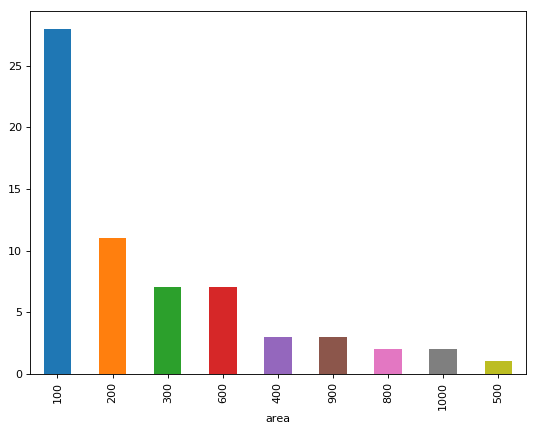

In [13]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
hist_not_sold['status'].plot(kind='bar')

In [14]:
not_sold_area = 0
for index, row in pd.DataFrame(hist_not_sold).iterrows():
    not_sold_area += index*row
print('there are '+str(not_sold_area[0])+' pixels not sold')

there are 19300 pixels not sold


### How many websites are not online anymore?

In [15]:
web.loc[web['status']=='time out'].shape[0]

1211

### Lets group them by status

In [16]:
web['status'].value_counts()

time out    1211
200          786
301          710
302          325
403           94
404           87
429           51
500           15
503            8
412            5
405            5
307            2
400            2
530            1
521            1
410            1
408            1
303            1
Name: status, dtype: int64

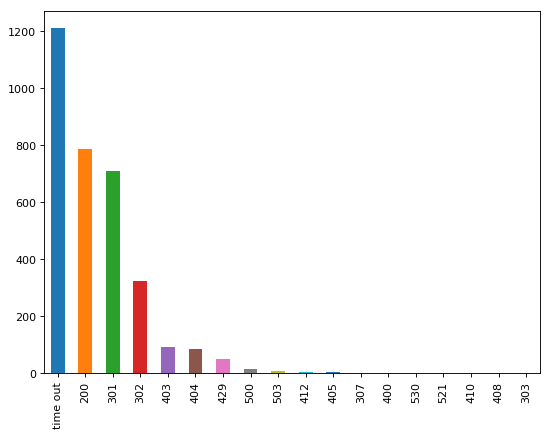

In [17]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
web['status'].value_counts().plot(kind='bar')

### Now lets group them by square area (directly related to price)
And plot it into a histogram

In [18]:
areas = web['area'].value_counts()

In [19]:
areas

100     1969
400      347
200      319
300      187
600      105
500       80
900       61
800       42
1000      37
1200      31
1600      16
1800      13
2400      11
2000       8
700        8
3000       7
1500       7
240        4
160        4
5400       3
5100       3
420        3
1100       3
1400       3
2700       3
3200       3
2500       3
3600       2
168        2
3500       2
252        2
3300       2
2800       2
3900       1
3400       1
8600       1
2600       1
1300       1
4800       1
6500       1
6400       1
5000       1
2200       1
2100       1
6000       1
1900       1
4000       1
Name: area, dtype: int64

In [20]:
# some more info about areas
areas.describe()

count      47.000000
mean       70.340426
std       292.207065
min         1.000000
25%         1.000000
50%         3.000000
75%        12.000000
max      1969.000000
Name: area, dtype: float64

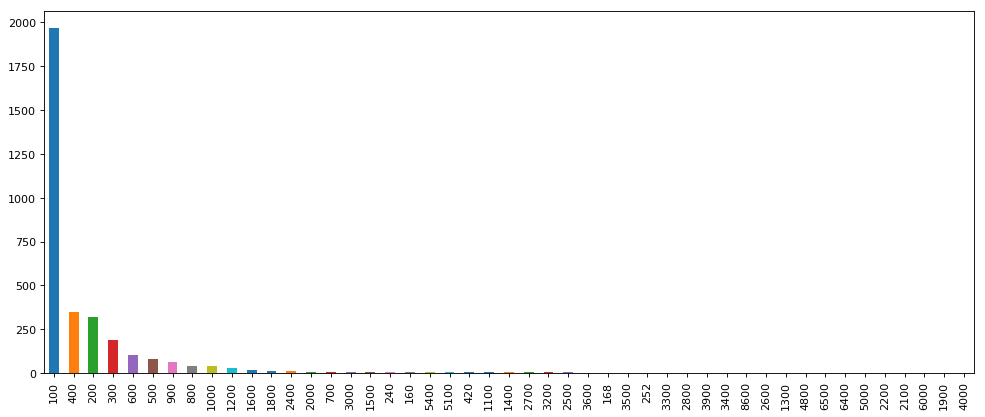

In [21]:
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
areas.plot(kind='bar')

### Whats the total area of the squares? (How much money was sold?)

In [22]:
# verufy if the total area is 1000000
total_area = 0
for index , row in pd.DataFrame(areas).iterrows():
    total_area += index*row 
total_area[0]

1002800

Interesting! he sold more than 1 Million Dollars!